# **Prediction using Unsupervised ML**

Applying Kmeans clustering on iris data set to determine the optimum number of clusters

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


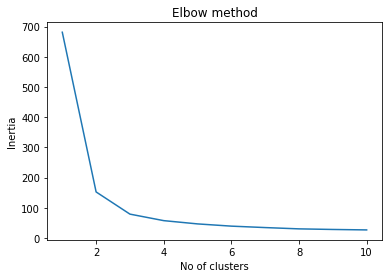

In [3]:
# Using the elbow method to determine the optimum number of clusters to devide the dataset into
x = iris_df.iloc[:, 0:].values
from sklearn.cluster import KMeans
wcss =[]
for clusters in range(1,11):
  kmeans = KMeans(n_clusters = clusters,init = "k-means++", random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
# Plotting the Within-Cluster-Sum-of-Squares (WCSS) values
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [4]:
# From the plot it's clear that the optimum number of clusters is 3, there is little change on increasing the number of clusters beyond 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

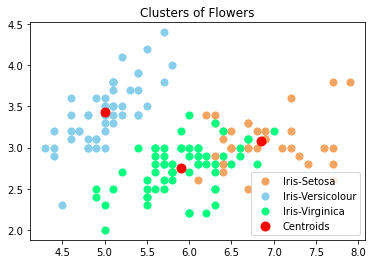

In [5]:
# Visualising the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'sandybrown', label = 'Iris-Setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'skyblue', label = 'Iris-Versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'springgreen', label = 'Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')
plt.title('Clusters of Flowers')
plt.legend()